In [119]:
import GEOparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
import logging
import warnings
from pandas.errors import DtypeWarning

logging.getLogger("GEOparse").setLevel(logging.WARNING)
warnings.filterwarnings("ignore", category=DtypeWarning)

data = GEOparse.get_GEO(filepath="data/GDS4414_full.soft")

20-Feb-2026 09:15:21 ERROR GEOparse - Cannot recognize type Annotation


In [3]:
full_df = data.table
# create a df with only expression data
gsm_cols = [col for col in full_df.columns if col.startswith('GSM')]
expr_df = full_df.set_index('IDENTIFIER')[gsm_cols]

# combine multiple probes of same the gene using mean
expr_df_collapsed = expr_df.groupby(expr_df.index).mean()

# transpose matrix so rows are samples and genes are columns
expr = expr_df_collapsed.T
print(expr.shape)

(15, 26681)


In [4]:
expr.head()

IDENTIFIER,--Control,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,...,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
GSM636860,8.987846,3.82911,3.95131,9.06737,9.56919,6.84063,6.986960,8.335215,7.511545,8.459865,...,4.620385,7.769490,7.047300,4.06859,8.285310,7.223145,6.880003,7.964220,4.56636,9.523710
GSM636861,8.988161,3.92371,3.85316,9.19738,9.47593,6.84905,6.996340,8.234610,7.404895,8.423065,...,4.432920,7.732275,7.072947,4.15371,8.354253,7.319315,7.007773,7.861380,4.60266,9.410350
GSM636862,9.073441,3.84854,3.99308,9.20111,9.67872,6.89832,7.041590,8.172690,7.551410,8.681960,...,4.527340,7.697260,7.058263,3.68539,8.269963,7.236655,6.879140,7.888720,4.47585,9.590180
GSM636863,8.811947,3.82165,3.76513,9.17930,9.51578,6.92504,7.057370,8.251420,7.706600,8.619025,...,4.587080,7.709225,7.063740,3.70268,8.257460,7.271140,7.078870,7.729360,4.40905,9.510325
GSM636864,9.256369,3.67983,3.75108,9.21690,9.59399,7.05309,6.894425,8.434525,7.703885,8.629580,...,4.542105,7.690665,7.129807,3.70906,8.408240,7.258705,6.967480,7.725755,4.52542,9.635380


In [5]:
sample = expr.iloc[2].to_numpy()

# Sample Descriptive Statistics

In [34]:
# Measures of Center
mean_val = np.mean(sample) 
median_val = np.median(sample) 

# Measures of Dispersion
std_dev = np.std(sample) 
variance_val = np.var(sample) 

# Range and Extrema
min_val = np.min(sample) 
max_val = np.max(sample) 
data_range = np.ptp(sample) # Peak-to-peak range (max - min)

# Percentiles/Quantiles
percentile_25 = np.percentile(sample, 25) #
percentile_75 = np.percentile(sample, 75) #

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance_val}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Range: {data_range}")
print(f"25th Percentile: {percentile_25}")
print(f"75th Percentile: {percentile_75}")

Mean: 5.943531306955402
Median: 5.600215
Standard Deviation: 2.2242013555789293
Variance: 4.947071670159146
Min: 2.26154
Max: 14.171475000000001
Range: 11.909935
25th Percentile: 4.12188
75th Percentile: 7.484795


In [31]:
def repeated_sample(initial_row, num_rows):
    """
    Creates a matrix where each subsequent row is derived from the previous row

        Args:
        initial_row (list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run and rows to derive

    Returns:
        np.array: resulting matrix and plot in a unique color pattern
    """

    current_row = np.array(initial_row)
    matrix = np.expand_dims(current_row, axis=0)
    
    for row in range(num_rows):
        next_row = (current_row-0.5)
        matrix = np.append(matrix, np.expand_dims(next_row, axis=0), axis=0)
        current_row = next_row

    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(matrix, cmap='inferno', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    

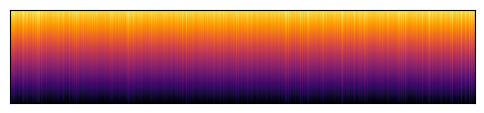

In [32]:
initial_row = sample[0: 1000]
repeated_sample(initial_row,num_rows=200)

In [40]:
def checkerboard_pattern(initial_row,num_rows):
    """
    Creates a matrix where each subsequent row is derived from the previous row

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)

    Returns:
        np.array: resulting matrix and plot in a unique black and white checkerboard 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[row]
        next_row = []
        for square in range(len(current_row)):
            if current_row[square] < mean_val:
                next_square = current_row[square] + mean_val
                
            elif current_row[square] >= mean_val:
                next_square = current_row[square] - mean_val
                
            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(matrix, cmap='viridis', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

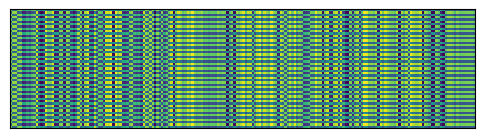

In [41]:
initial_row = sample[0: 200]
checkerboard_pattern(initial_row,num_rows=50)

In [81]:
def colorful_rows(initial_row, num_rows, stat, cmap='gray'):
    """
    1D cellular automaton creating a matrix where each subsequent row is derived from the previous row 

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)
        stat (float64): descriptive statistic used in patern calculations, mean_val, median_val, std_dev, variance_val
        cmap (str): Color map name (default = "gray")

    Returns:
        np.array: plot of a unique pattern of inverted shaded triangles 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[row]
        next_row = []
        for square in range(len(current_row)):
            # apply same neighbor rules, center left and right square must be uniform
            left = current_row[square-1] if square > 0 else 0
            center = current_row[square]
            right = current_row[square+1] if square < len(current_row)-1 else 0
            
            if (left < stat and center < stat and right < stat) or \
            (left == stat and center == stat and right == stat):
                count = 1
                pointer = 2

                while True:
                    left_index  = square - pointer
                    right_index = square + pointer
    
                    # If out of bounds stop expanding
                    if left_index < 0 or right_index >= len(current_row):
                        break
                
                    left = current_row[left_index]
                    center = current_row[square]
                    right = current_row[right_index]
    
                    if (left < stat and center < stat and right < stat) or \
                    (left == stat and center == stat and right == stat):
                        count += 1
                        pointer += 1
                
                    else:
                        break

                next_square = (current_row[square]-(stat))

            else:
                next_square = 1
                
            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.imshow(matrix, cmap=cmap, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.savefig('results/genomic_colorful_rows_pattern.jpg')
    plt.show()

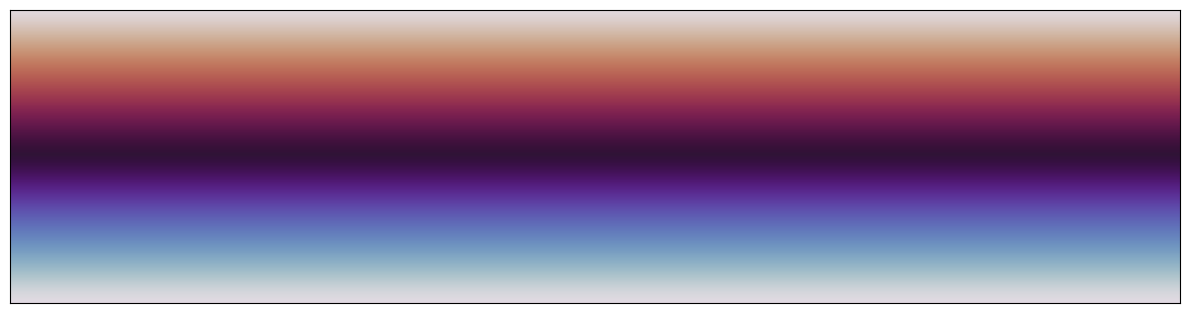

In [82]:
initial_row = sample[0: 2000]
colorful_rows(initial_row, num_rows=500, stat=std_dev, cmap='twilight')

In [87]:
def one_uniform_neighbor(initial_row, sample_max, num_rows):
    """
    1D cellular automaton creating a matrix where each subsequent row is derived from the previous row applying 
    the exactly 1 neighbor is 1 rule. 

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        sample_max (float64): maximum value in intial row
        num_rows (int): number of itterations to run (rows to derive and add to matrix)

    Returns:
        np.array: resulting plot of pattern generated unique black and white checkerboard 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[-1]
        next_row = []
        for square in range(len(current_row)):
            # apply XOR rule, exactly one neighbor is 1
            left = current_row[square-1] if square > 0 else 0
            right = current_row[square+1] if square < len(current_row)-1 else 0
            next_square = sample_max if ((left == sample_max) ^ (right == sample_max)) else 0 
            
            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(matrix, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

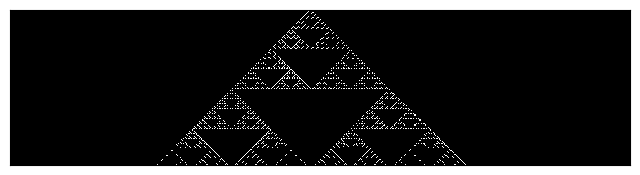

In [91]:
initial_row = sample[0: 2000]
sample_max = np.max(initial_row)
one_uniform_neighbor(initial_row, sample_max, num_rows=500)

In [134]:
def colorful_one_uniform_neighbor(initial_row, num_rows, sample_max, decay, cmap='twilight_shifted'):
    """
    1D cellular automaton creating a matrix where each subsequent row is derived from the previous row applying 
    the exactly 1 neighbor is 1 rule. 

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)
        sample_max (float64): maximum value in intial row
        decay (int): for scaling color saturation
        cmap (str): Color map name (default = "twilight_shifted")

    Returns:
        np.array: resulting plot of generated pattern of unique shaded pyraminds 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[-1]
        next_row = []
        for square in range(len(current_row)):
            
            left = current_row[square-1] if square > 0 else 0
            right = current_row[square+1] if square < len(current_row)-1 else 0
            # apply XOR rule, exactly one neighbor is 1
            if (left == sample_max) ^ (right == sample_max):
                next_square = sample_max

            else:

                count = 1
                pointer = 2 

                while True:
                    
                    left_index = square - pointer
                    right_index = square + pointer

                    if left_index < 0 or right_index >= len(current_row):
                        break

                    left = current_row[left_index]
                    right = current_row[right_index]

                    if (left != 1 and right != 1):
                        count += 1
                        pointer += 1
                                   
                    
                    else:
                        break  
                        
                next_square = sample_max - np.exp(-count/decay)

            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    matrix = matrix[1:]
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(matrix, cmap=cmap, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.savefig('results/genomic_colorful_one_uniform_neighbor_pattern.jpg')
    plt.show()

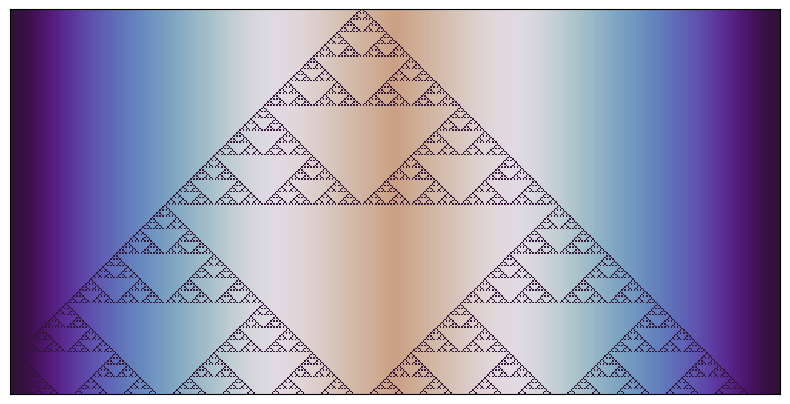

In [135]:
initial_row = sample[0: 500]
row_to_scale = initial_row.reshape(-1, 1)
scaled_row = [MinMaxScaler().fit_transform(row_to_scale)][0]
normalized_row = scaled_row.flatten()
sample_max = np.max(normalized_row)
size = len(normalized_row) 
decay = size/2
colorful_one_uniform_neighbor(normalized_row, num_rows=250, sample_max=sample_max, decay=decay, cmap='twilight_shifted')

In [169]:
def one_uniform_neighbor_colorful_genomic_background(initial_row, num_rows, stat, sample_max, cmap='twilight_shifted'):
    """
    1D cellular automaton creating a matrix where each subsequent row is derived from the previous row applying 
    the exactly 1 neighbor is 1 rule. 

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)
        stat (float64): descriptive statistic used in patern calculations, mean_val, median_val, std_dev, variance_val
        sample_max (float64): maximum value in intial row
        cmap (str): Color map name (default = "twilight_shifted")

    Returns:
        np.array: resulting plot of generated pattern of unique shaded pyraminds 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[-1]
        next_row = []
        for square in range(len(current_row)):
            
            left = current_row[square-1] if square > 0 else 0
            right = current_row[square+1] if square < len(current_row)-1 else 0
            # apply XOR rule, exactly one neighbor is 1
            if (left == sample_max) ^ (right == sample_max) 
                next_square = sample_max

            else:

                count = 1
                pointer = 2 

                while True:
                    left_index  = square - pointer
                    right_index = square + pointer
    
                    # If out of bounds stop expanding
                    if left_index < 0 or right_index >= len(current_row):
                        break
                
                    left = current_row[left_index]
                    center = current_row[square]
                    right = current_row[right_index]
    
                    if (left < stat and center < stat and right < stat) or \
                    (left == stat and center == stat and right == stat):
                        count += 1
                        pointer += 1
                
                    else:
                        break

                next_square = (current_row[square]-(stat))

            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    matrix = matrix[1:]
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(matrix, cmap=cmap, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.savefig('results/one_uniform_neighbor_colorful_genomic_pattern.jpg')
    plt.show()

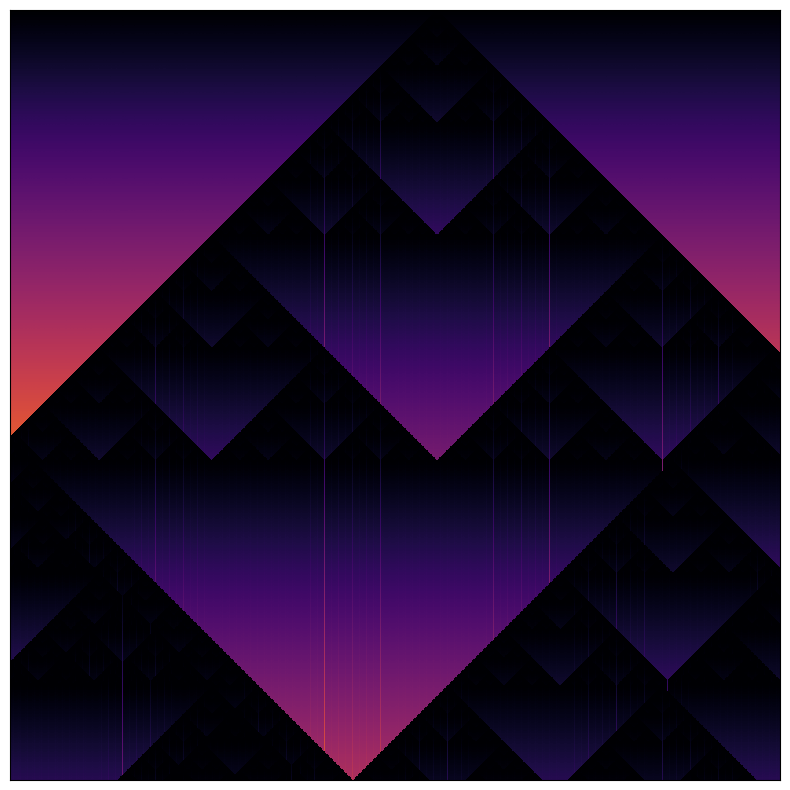

In [174]:
initial_row = sample[0: 1750]
row_to_scale = initial_row.reshape(-1, 1)
scaled_row = [MinMaxScaler().fit_transform(row_to_scale)][0]
normalized_row = scaled_row.flatten()
sample_max = np.max(normalized_row)
size = len(normalized_row) 

one_uniform_neighbor_colorful_genomic_background(
    normalized_row, 
    num_rows=1750, 
    stat=sample_max,
    sample_max=sample_max,
    cmap='inferno_r'
)

In [269]:
def three_similar_neighbors_colorful_genomic_background(initial_row, num_rows, stat, cmap='twilight_shifted'):
    """
    1D cellular automaton creating a matrix where each subsequent row is derived from the previous row applying 
    the exactly 1 neighbor is 1 rule. 

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)
        stat (float64): descriptive statistic used in patern calculations, mean_val, median_val, std_dev, variance_val
        cmap (str): Color map name (default = "twilight_shifted")

    Returns:
        np.array: resulting plot of generated pattern of unique shaded pyraminds 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[-1]
        next_row = []
        for square in range(len(current_row)):
            
            left = current_row[square-1] if square > 0 else 0
            right = current_row[square+1] if square < len(current_row)-1 else 0
            center = current_row[square]
            
            if (left <= stat and center <= stat and right <= stat)or \
            (left >= stat and center >= stat and right >= stat):
                next_square = (left + center + right)/3

            elif (left <= stat and center <= stat and right >= stat)or \
            (left >= stat and center >= stat and right <= stat):
                next_square = (left + center + right)/2

            elif (left >= stat and center <= stat and right <= stat)or \
            (left <= stat and center >= stat and right >= stat):
                next_square = (left + center + right)/2
                
            else: 
                next_square = center*0.9995
                    
            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    #matrix = matrix[1:]
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(matrix, cmap=cmap, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.savefig('results/one_uniform_neighbor_colorful_genomic_pattern.jpg')
    plt.show()

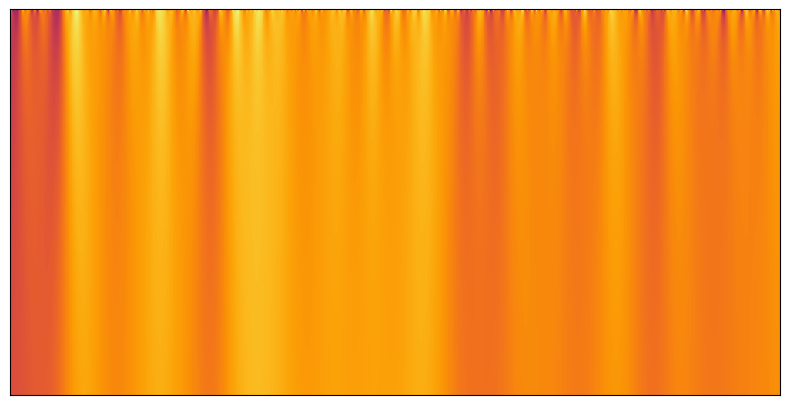

In [271]:
initial_row = sample[0: 1000]
row_to_scale = initial_row.reshape(-1, 1)
scaled_row = [MinMaxScaler().fit_transform(row_to_scale)][0]
normalized_row = scaled_row.flatten()
sample_mean = np.mean(normalized_row)
size = len(normalized_row) 

three_similar_neighbors_colorful_genomic_background(
    initial_row, 
    num_rows=500, 
    stat=std_dev,
    cmap='inferno_r'
)